In [1]:
#패션 MNIST 데이터 가지고 분류 --> 이미지 데이터

In [2]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4848 sha256=66068ecd52b86fc067b52288210d992bc104e010ab17140c1c563d4eb9dbaa52
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [4]:
from tensorflow import keras
# from sklearn.model_selection import train_test_split

In [5]:
(x_train,y_train),(x_target,y_target) =  keras.datasets.fashion_mnist.load_data()
# x_train, x_target, y_train, y_target =  train_test_split()

4431872/4422102 [==============================] - 0s 0us/step


In [11]:
import numpy as np
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [13]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [14]:
import matplotlib.pyplot as plt

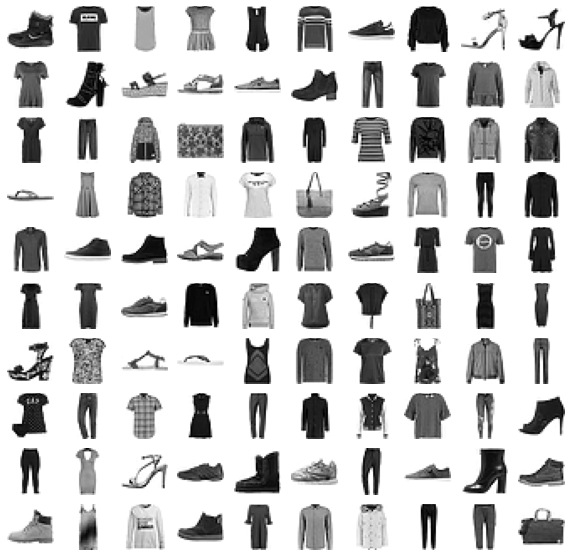

In [15]:
fig, axs =  plt.subplots(10,10, figsize=(10,10))
for i in range(10):
    for j in range(10):        
        axs[i,j].imshow(x_train[i*10+j], cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

In [16]:
# 머신러닝 로지스틱 회귀를 이용해서 이미지들을 분류
# 전체데이터를 다 사용하지 않고 하나씩 꺼내서 훈련하는 방법
# 조금씩 산을 내려가는 방법과 유사..... 경사하강법 - 확률적 경사하강법
# SGDClassfier--> 데이터 표준화
# 보통 이미지를 표현하는 값의 범위는 0 ~ 255 의 범위를 갖는다. 
# 0~10 : 1 5 8 9 7 4    값의 범위를 알고 있으면 해당 범위로 나누면.. 0~1사의 값을 
# 가지는 표준화

In [25]:
x_train_scaled =  x_train / 255  # 0 ~ 1
x_train_scaled.shape

(60000, 28, 28)

In [26]:
#SGDClassfier --> 2차원만 처리...
x_train_scaled = x_train_scaled.reshape(-1,28*28)
x_train_scaled.shape

(60000, 784)

In [27]:
from sklearn.linear_model import SGDClassifier   # 확율적 경사하강법
from sklearn.model_selection import cross_validate # 교차 검증

In [28]:
sc = SGDClassifier(loss='log', random_state=42)

In [29]:
scores = cross_validate(sc,x_train_scaled, y_train,n_jobs=-1)
scores

{'fit_time': array([37.21979618, 39.35875177, 36.62474465, 38.10148406, 38.91277504]),
 'score_time': array([0.04402685, 0.0370326 , 0.051368  , 0.04687405, 0.03692961]),
 'test_score': array([0.84825   , 0.84325   , 0.84991667, 0.83425   , 0.83333333])}

In [30]:
scores['test_score'].mean()

0.8417999999999999

In [31]:
# 인공신경망... 확률적 경사하강법.... 로지스틱 회귀와 같다.
# 인공신경망에서는 교차검증을 잘 안씀. 검증세트를 별로도 덜어내서 사용
# 로지스틱회귀 = 가장 간단한 인공신경망
# 인공신경망을 만드는 최신 라이브러리들은 SGDClassifier에 없는 몇 가지 기능
# ---> 텐서플로의 케라스

In [32]:
import tensorflow as tf

In [33]:
# 인공신경망을 이용해서 모델을 구성해 보기

In [41]:
# 위에서 scaled 한 학습용 데이터를 다시 훈련용과 테스트용으로 분리 (8:2)
from sklearn.model_selection import train_test_split
x_train_sc, x_target_sc, y_train_sc, y_target_sc  = train_test_split(
    x_train_scaled,y_train, test_size=0.2)

In [36]:
#원래 훈련데이터에서 20%를 덜어냈음

In [42]:
x_train_sc.shape, x_target_sc.shape, y_train_sc.shape, y_target_sc.shape

((48000, 784), (12000, 784), (48000,), (12000,))

In [44]:
# 밀집층을 하나 만들었음 - 신경망모델 디자인
dens = keras.layers.Dense(10, activation='softmax', input_shape=(28*28,))
# 다중분류는 softmax 활성화함수
# 이진분류는 sigmoid 활성화함수

In [45]:
# 신경망 모델을 생성
model = keras.Sequential([dens])

In [46]:
# 적용... 이 과정은 동일함
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=["accuracy"]
)